# Conhecendo o Dataset e Testando Possibilidades

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pytesseract
import re
from sklearn.cluster import KMeans 
import seaborn as sns

## Testando extração de CNPJ com Imagem Natural

#### Lê-se as imagens normalmente, aplica-se o "pytesseract" para retirar os textos legíveis da imagem e passa-se a regex de CNPJ para identificar os números, extraindo-os do texto lido da imagem.

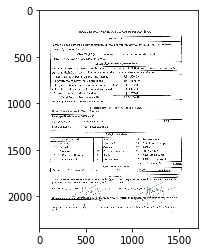

Inscr. Estadual 79384590 |.R.F. 01.01 CNPJ 13.710.943/0001-50 0


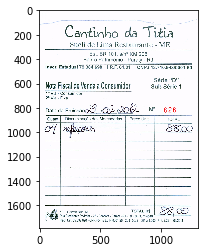

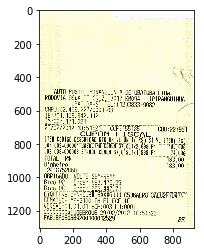

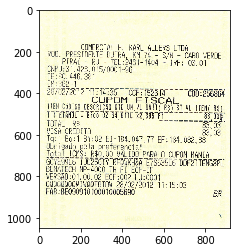

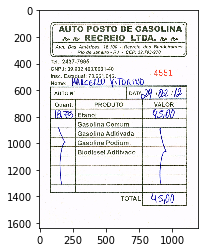

ENPJ: 72.008.353/0030-30 0


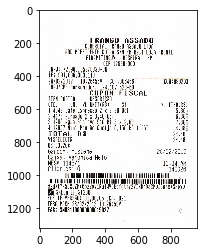

In [16]:
def extract(text):
    i = 0
    p = re.compile('.*\d{2}\.\d{3}\.\d{3}\/\d{4}-\d{2}.*')
    for line in iter(text.splitlines()):
        s = p.match(line)
        if s:
            print(s.group(), i)
            i += 1


files_path = sorted([os.path.abspath('..') +'/notasFiscais/' + x for x in os.listdir('../notasFiscais') if x.endswith('.jpg')])

base_teste = []

# Extraindo as características das imagens na base de dados
for i in files_path:
    diretorio, arquivo = os.path.split(i)
    imagem = cv2.imread(i)
    text = pytesseract.image_to_string(imagem, lang='por')
    print('='*80)
    extract(text)
    print('='*80)
    plt.imshow(imagem[:,:,::-1])
    plt.show()

#### Verificando se a regex captura corretamente o modelo de CNPJ.

In [45]:
text = 'gtg 67.824.422/0001-52 aeqweqeqw 67.824.422/0001-52 asdasda'
p = re.compile('\d{2}\.\d{3}\.\d{3}\/\d{4}-\d{2}')
k = p.findall(text)
print(k)

['67.824.422/0001-52', '67.824.422/0001-52']


## Binarizar imagem

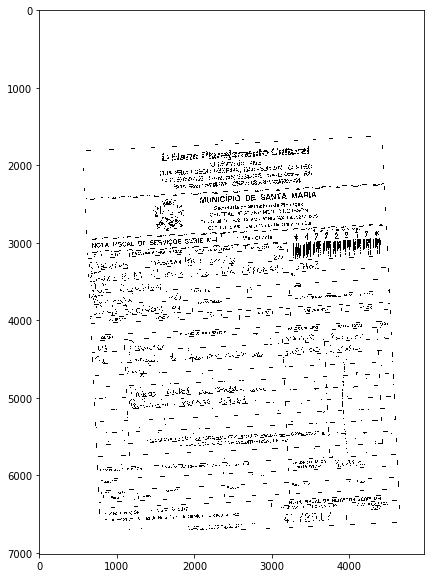

CNPJ:63.004.030/0001-96 0


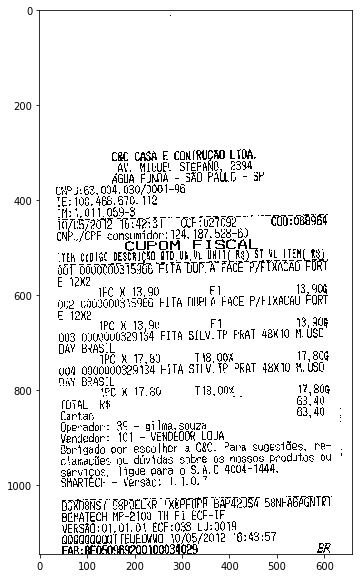

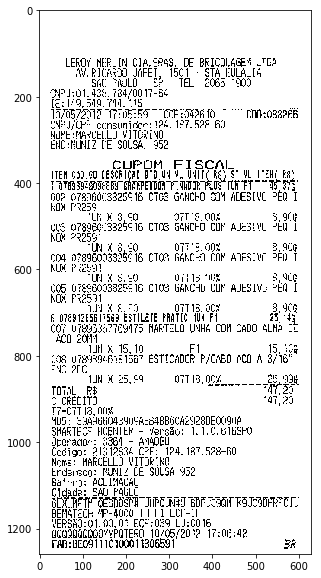

CPF/CNPJ: 01.613.606/0001-93 Inscrição Municipal: 0.214.441-7 Inscrição Estadual: — 0
CPFICNPJ: 01.613.606/0001-93 Inscrição Municipal: 0,214,441.7 Inscrição Estadual: — 0


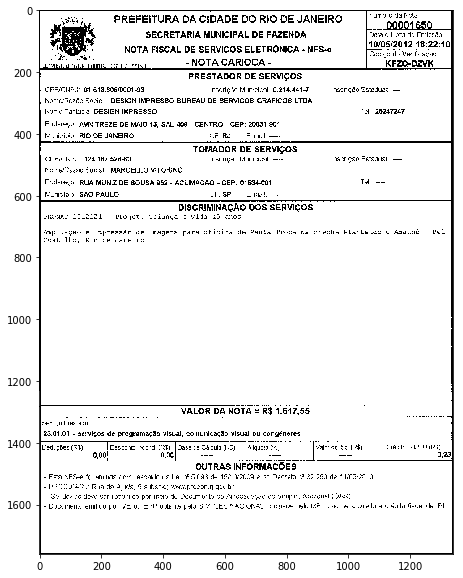

CNPJ Nº: 43.962.539/0001-34 Inscrição Estadual Nº.: 110.348.074.110 0
CNPJ Nº: 43.962.539/0001-34 Inscrição Estadual Nº.: 110.348.074.110 0


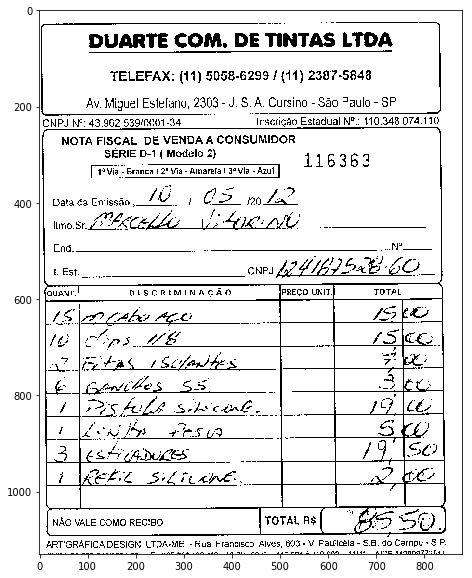

Usuário: 14.753.740/0001-03 - NF-e - Nota Fiscal Eletrônica de Serviços - São Paulo - Página 1 de 1 0
CPF/CNPJ: 14.753.740/0001-03 Inscrição Municipal: 4.430.719-5 1
CPF/CNFPJ: 14.753.740/0001-03 Inscrição Municipal: 4.430.719-5 0


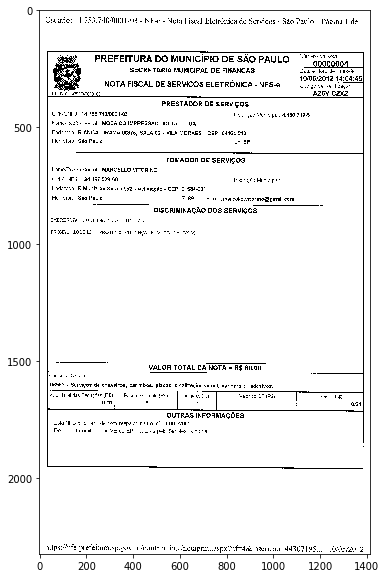

In [89]:
def extract(text):
    i = 0
    p = re.compile('.*\d{2}\.\d{3}\.\d{3}\/\d{4}-\d{2}.*')
    for line in iter(text.splitlines()):
        s = p.match(line)
        if s:
            print(s.group(), i)
            i += 1

files_path = sorted([os.path.abspath('..') +'/notasFiscais/' + x for x in os.listdir('../notasFiscais') if x.endswith('.jpg')])

base_teste = []

#extraindo as características das imagens na base de dados
for i in files_path:
    diretorio, arquivo = os.path.split(i)
    imagem = cv2.imread(diretorio + '/images/' + arquivo, 0)
    text = pytesseract.image_to_string(i, lang='por')
    print('='*80)
    extract(text)
    print('='*80)

    ret,W = cv2.threshold(imagem,150,255,cv2.THRESH_BINARY)
    text = pytesseract.image_to_string(W, lang='por')
    print('='*80)
    extract(text)
    print('='*80)
    
    plt.figure(figsize=(10,10))
    plt.gray()
    plt.imshow(W)
    plt.show()

# Aplicando processo de fechamento nas imagens

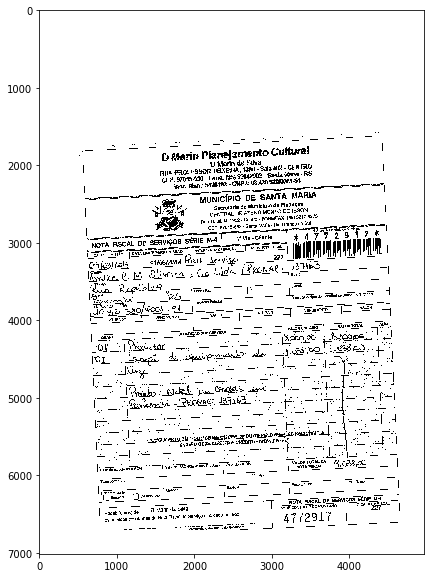

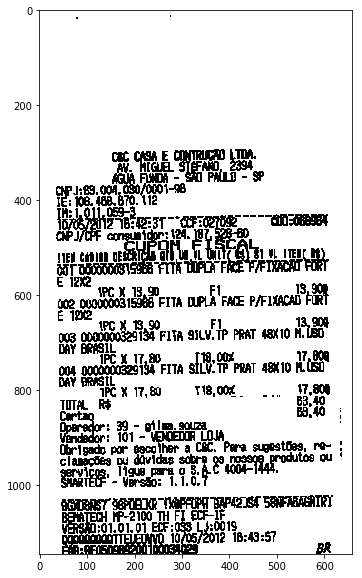

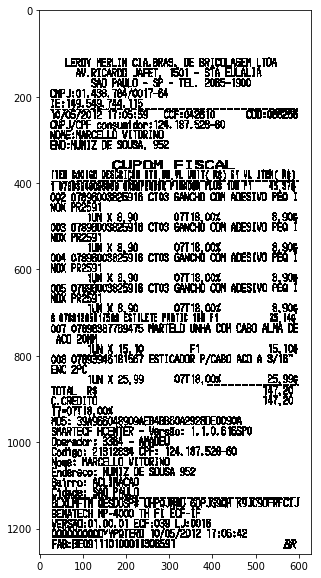

CPF/CNPJ: 01.513.606/0001-83 Insorição Municipel: 0.214,441-7 Inscrição Estadual: — 0


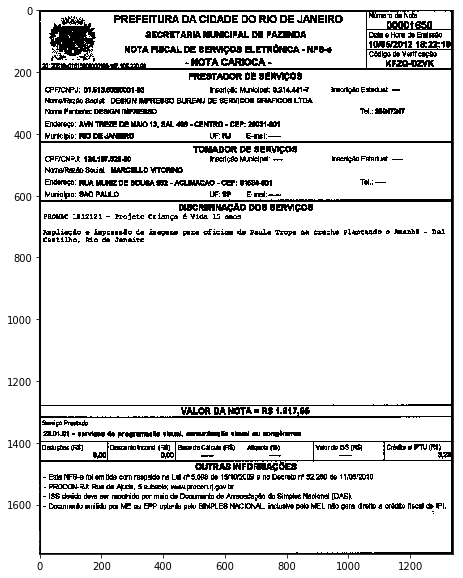

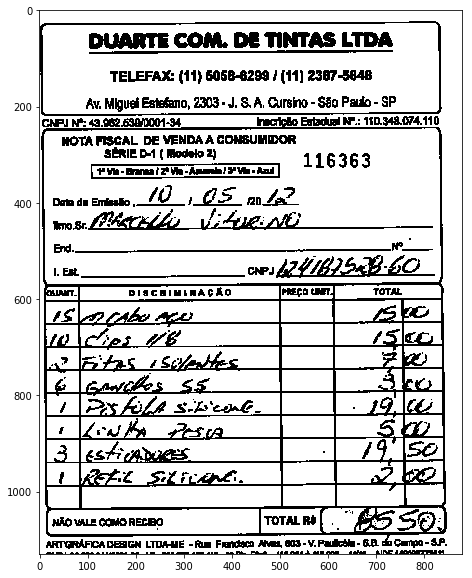

Usuário: 14.753.740/0001-03 - NF-e - Nota Fiscal Eletrônica de Serviços - São Paulo  Página 1 de 1 0


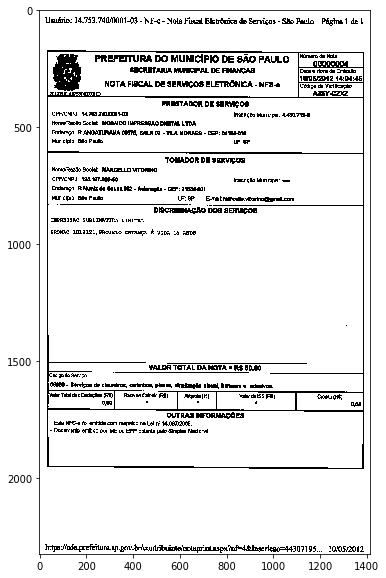

In [116]:
def extract(text):
    i = 0
    p = re.compile('.*\d{2}\.\d{3}\.\d{3}\/\d{4}-\d{2}.*')
    for line in iter(text.splitlines()):
        s = p.match(line)
        if s:
            print(s.group(), i)
            i += 1

files_path = sorted([os.path.abspath('..') +'/notasFiscais/' + x for x in os.listdir('../notasFiscais') if x.endswith('.jpg')])

base_teste = []

#extraindo as características das imagens na base de dados
for i in files_path:
    diretorio, arquivo = os.path.split(i)
    imagem = cv2.imread(diretorio + '/images/' + arquivo, 0)
#     text = pytesseract.image_to_string(imagem, lang='por')
#     print('='*80)
#     extract(text)
#     print('='*80)

    ret,imagemBinaria = cv2.threshold(imagem,150,255,cv2.THRESH_BINARY)
    elementoEstruturante = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    imagemProcessada = cv2.erode(imagemBinaria, elementoEstruturante, iterations = 1 )

    text = pytesseract.image_to_string(imagemBinaria, lang='por')
    print('='*80)
    extract(text)
    print('='*80)
    
    plt.figure(figsize=(10,10))
    plt.gray()
    plt.imshow(imagemProcessada)
    plt.show()



In [67]:
def extract(text):
    i = 0
    p = re.compile('.*\d{2}\.\d{3}\.\d{3}\/\d{4}-\d{2}.*')
    for line in iter(text.splitlines()):
        s = p.match(line)
        if s:
            print(s.group(), i)
            i += 1

files_path = sorted([os.path.abspath('..') +'/notasFiscais/' + x for x in os.listdir('../notasFiscais') if x.endswith('.jpg')])

hists = []
imagens = []
print('=' * 80)
print('INICIANDO LEITURA DE IMAGENS')
print('=' * 80)

#extraindo as características das imagens na base de dados
for i in files_path:
    diretorio, arquivo = os.path.split(i)
    imagem = cv2.imread(diretorio + '/pdfs/' + arquivo, 0)
    imagens.append(imagem)
    hists.append(np.squeeze(np.asarray(cv2.calcHist([imagem],[0],None,[256],[0,256]))))

print('=' * 80)
print('FINALIZANDO LEITURA DE IMAGENS')
print('=' * 80)

INICIANDO LEITURA DE IMAGENS


## Verificando possível K 

In [71]:
sse = {}

for k in range(1, 21):
    print('=' * 80)
    print('INICIANDO KMEANS {}'.format(k))
    print('=' * 80)    
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(hists)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_
    print('=' * 80)
    print('FINALIZANDO KMEANS {}'.format(k))
    print('=' * 80) 

INICIANDO KMEANS 1
FINALIZANDO KMEANS 1
INICIANDO KMEANS 2
FINALIZANDO KMEANS 2
INICIANDO KMEANS 3
FINALIZANDO KMEANS 3
INICIANDO KMEANS 4
FINALIZANDO KMEANS 4
INICIANDO KMEANS 5
FINALIZANDO KMEANS 5
INICIANDO KMEANS 6
FINALIZANDO KMEANS 6
INICIANDO KMEANS 7
FINALIZANDO KMEANS 7
INICIANDO KMEANS 8
FINALIZANDO KMEANS 8
INICIANDO KMEANS 9
FINALIZANDO KMEANS 9
INICIANDO KMEANS 10
FINALIZANDO KMEANS 10
INICIANDO KMEANS 11
FINALIZANDO KMEANS 11
INICIANDO KMEANS 12
FINALIZANDO KMEANS 12
INICIANDO KMEANS 13
FINALIZANDO KMEANS 13
INICIANDO KMEANS 14
FINALIZANDO KMEANS 14
INICIANDO KMEANS 15
FINALIZANDO KMEANS 15
INICIANDO KMEANS 16
FINALIZANDO KMEANS 16
INICIANDO KMEANS 17
FINALIZANDO KMEANS 17
INICIANDO KMEANS 18
FINALIZANDO KMEANS 18
INICIANDO KMEANS 19
FINALIZANDO KMEANS 19
INICIANDO KMEANS 20
FINALIZANDO KMEANS 20


[1 0 0 2 0 2]
{1: 1.523826178970961e+16, 2: 6363911078282157.0, 3: 3841149661068337.0, 4: 3001113888230134.0, 5: 2203892143138434.0, 6: 1821767033365271.5, 7: 1470718707606118.5, 8: 1182768786120919.5, 9: 1026061172453354.6, 10: 932656001642281.1, 11: 853601686411539.9, 12: 757432699088317.5, 13: 684364271502414.0, 14: 624671804939419.6, 15: 559614210223402.75, 16: 508306956979209.7, 17: 494565642586160.8, 18: 456859332411032.6, 19: 436708234451802.56, 20: 417570648831300.5}


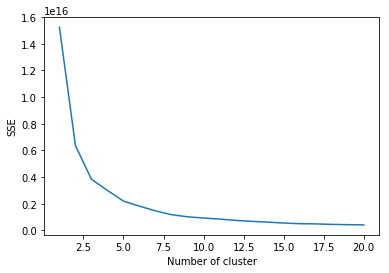

In [72]:
print(kmeans_model.labels_)
print(sse)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [84]:
print('=' * 80)
print('INICIANDO KMEANS {}'.format(5))
print('=' * 80)    
kmeans = KMeans(n_clusters=5, max_iter=1000).fit(hists)
print('=' * 80)
print('FINALIZANDO KMEANS {}'.format(5))
print('=' * 80) 

print(kmeans.labels_[0:20])

INICIANDO KMEANS 5
FINALIZANDO KMEANS 5
[0 1 0 1 2 2 2 2 1 0 2 2 0 3 2 4 0 1 2 1]


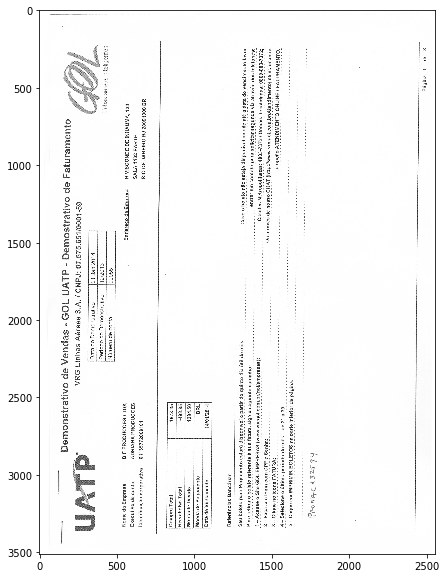

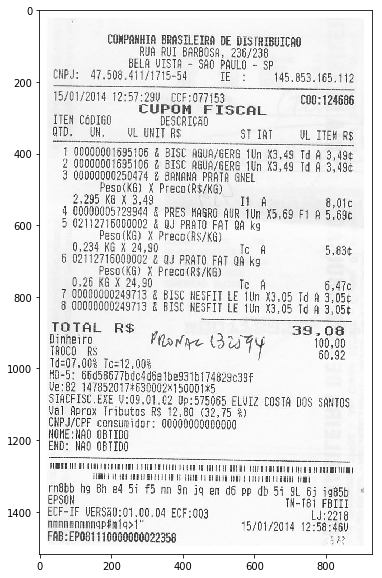

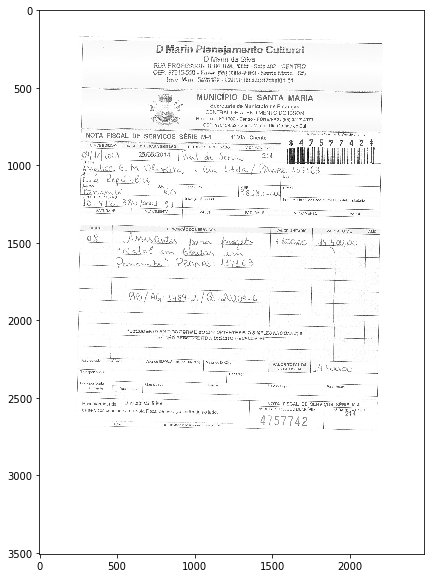

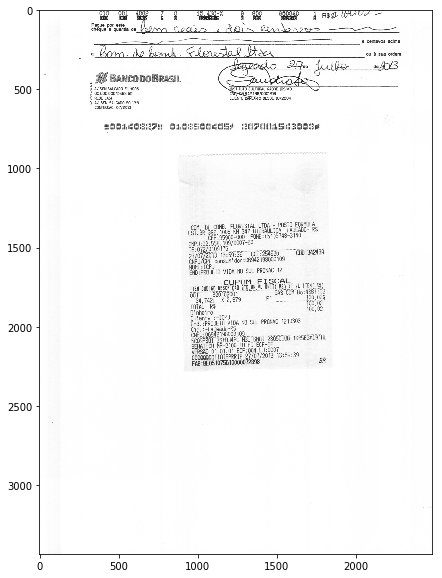

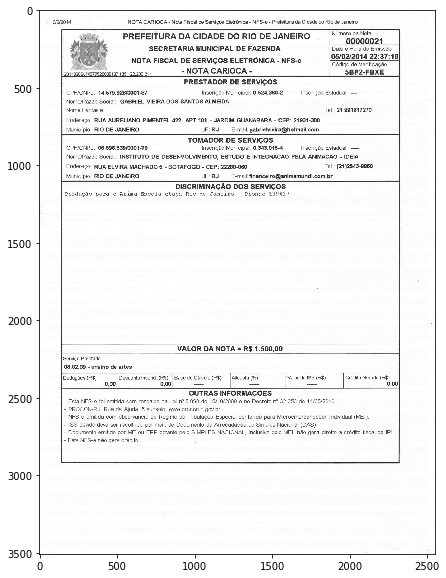

In [73]:
# 0
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(imagens[13])
plt.show()

# 1
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(imagens[4])
plt.show()

#2
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(imagens[1])
plt.show()

#3
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(imagens[0])
plt.show()

#4
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(imagens[15])
plt.show()

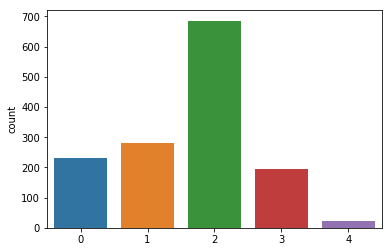

In [97]:
A = len(kmeans.labels_[kmeans.labels_ == 0])
B = len(kmeans.labels_[kmeans.labels_ == 1])
C = len(kmeans.labels_[kmeans.labels_ == 2])
D = len(kmeans.labels_[kmeans.labels_ == 3])
E = len(kmeans.labels_[kmeans.labels_ == 4])

sns.countplot(x=kmeans.labels_)

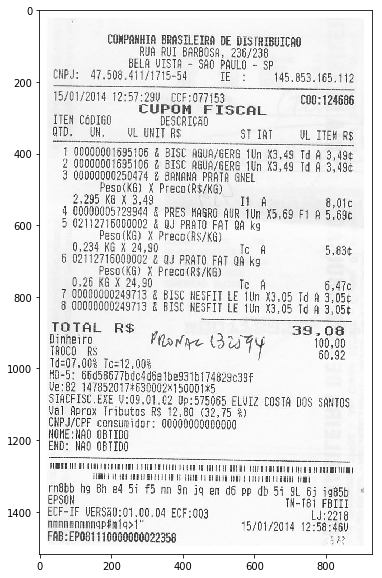

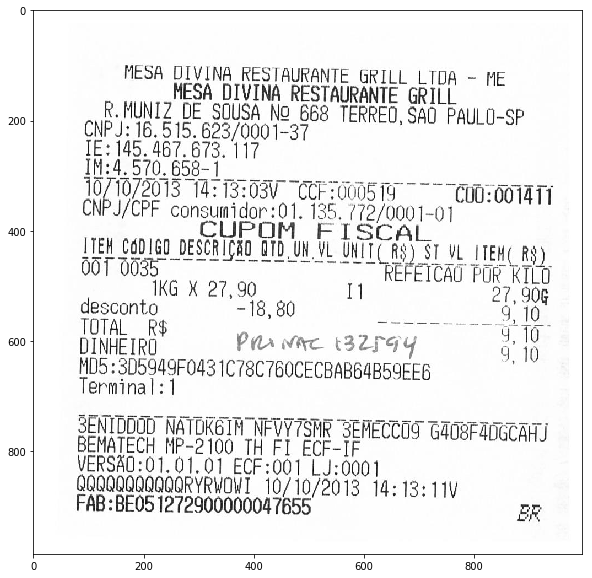

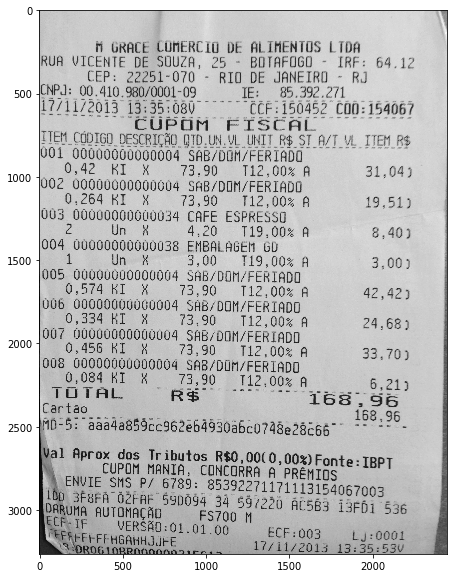

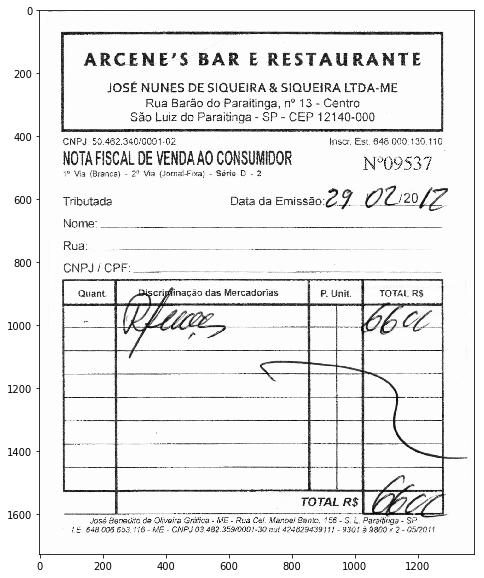

In [74]:
# 1
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(imagens[4])
plt.show()

plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(imagens[5])
plt.show()

plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(imagens[6])
plt.show()

plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(imagens[7])
plt.show()
